# Tugas 05 - Pemrosesan Data Citra

Nama : Muh.Ikhsan

NIM  : H071191049

## 1. Data Citra

In [1]:
# Mengimport Library
import cv2 as cv
from matplotlib import pyplot as plt
from keras.preprocessing.image import img_to_array

1. Import Gambar dan menampilkannya

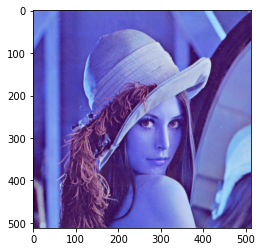

In [2]:
image = cv.imread("/content/drive/MyDrive/Dataset/lenna.png")
plt.imshow(image)

karena open cv membaca gambar dengan format bgr sedangkan imshow dengan matplotlib.pyplot menampilkan gambar dengan format rgb maka color citra perlu diconvert terlebih dahulu

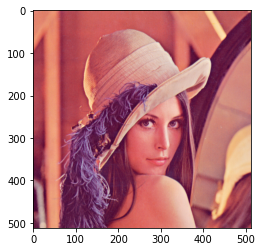

In [3]:
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)

Cara melakukan split citra menjadi 3 channel red, green, dan blue

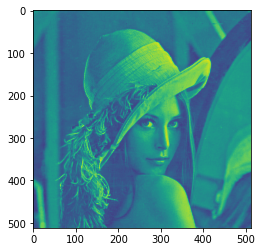

In [4]:
r,g,b = cv.split(image_rgb)
plt.imshow(b)

mengubah citra ke array

In [5]:
image_array = img_to_array(image_rgb)
print(image_array)

[[[226. 137. 125.]
  [226. 137. 125.]
  [223. 137. 133.]
  ...
  [230. 148. 122.]
  [221. 130. 110.]
  [200.  99.  90.]]

 [[226. 137. 125.]
  [226. 137. 125.]
  [223. 137. 133.]
  ...
  [230. 148. 122.]
  [221. 130. 110.]
  [200.  99.  90.]]

 [[226. 137. 125.]
  [226. 137. 125.]
  [223. 137. 133.]
  ...
  [230. 148. 122.]
  [221. 130. 110.]
  [200.  99.  90.]]

 ...

 [[ 84.  18.  60.]
  [ 84.  18.  60.]
  [ 92.  27.  58.]
  ...
  [173.  73.  84.]
  [172.  68.  76.]
  [177.  62.  79.]]

 [[ 82.  22.  57.]
  [ 82.  22.  57.]
  [ 96.  32.  62.]
  ...
  [179.  70.  79.]
  [181.  71.  81.]
  [185.  74.  81.]]

 [[ 82.  22.  57.]
  [ 82.  22.  57.]
  [ 96.  32.  62.]
  ...
  [179.  70.  79.]
  [181.  71.  81.]
  [185.  74.  81.]]]


Beberapa convert color citra yang lain

In [6]:
# Mengubah citra dari bgr ke gray namun perlu dirubah dari gray ke rgb lagi
image_grc_temp = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image_grc = cv.cvtColor(image_grc_temp, cv.COLOR_GRAY2RGB)

# Merubah citra dari rgb ke hsv
image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

perbandingan ke 4 jenis color

<function matplotlib.pyplot.show>

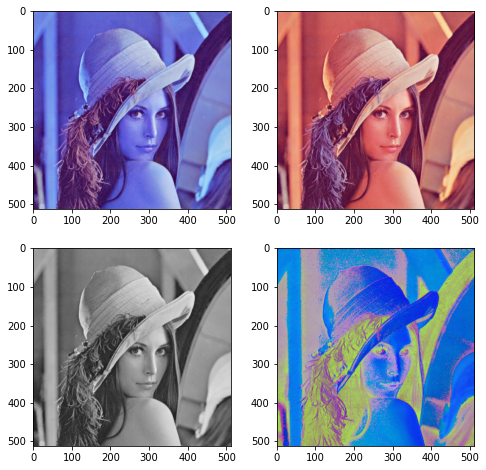

In [7]:
fig = plt.figure(num=None, figsize=(8,8))

# Image BGR
ax = fig.add_subplot(2, 2, 1)
plt.imshow(image)

# Image RGB
ax = fig.add_subplot(2, 2, 2)
plt.imshow(image_rgb)

# Image grayscale
ax = fig.add_subplot(2, 2, 3)
plt.imshow(image_grc)

# Image hsv
ax = fig.add_subplot(2, 2, 4)
plt.imshow(image_hsv)

plt.show

Menampilkan histogram dari ke 4 jenis color pada citra sebelumnya

<function matplotlib.pyplot.show>

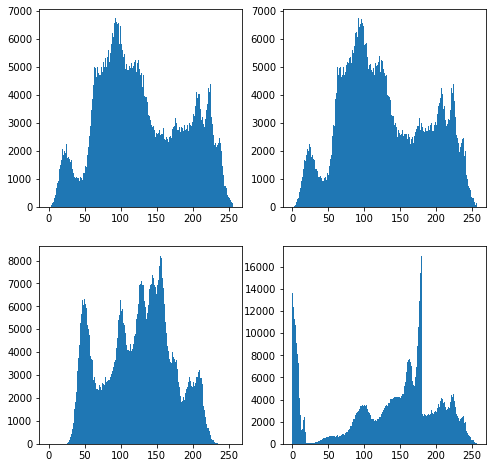

In [8]:
fig = plt.figure(num=None, figsize=(8,8))

ax = fig.add_subplot(2, 2, 1)
plt.hist(image.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 2)
plt.hist(image_rgb.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 3)
plt.hist(image_grc.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 4)
plt.hist(image_hsv.ravel(),256,[0,256])

plt.show

## Augmentasi Citra

Augmentasi = metode manambah data secara arcivisial, zoom, tesion, shift

Augmentasi Data adalah salah satu teknik regularisasi yang paling umum, terutama umum dalam tugas pemrosesan gambar.

Untuk menghindari overfitting, dilakukan sedikit penambahan sedikit variasi saat memasukkan gambar ke model hal inilah yang disebut augmentasi. Meskipun rotasi 2 derajat mungkin tidak membuat perbedaan besar pada mata manusia, variasi kecil seperti itu cukup berguna untuk memungkinkan model digeneralisasi dengan baik.

### Resize Image
Mengubah ukuran citra menjadi 224x224

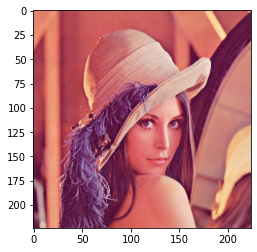

In [9]:
image_resize = cv.resize(image_rgb, (224, 224))
plt.imshow(image_resize)

Meresize beberapa image kemudian memindahkan hasil resize ke folder baru

In [10]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnetv2
import numpy as np
import os
from PIL import Image

Membuat direktori

In [11]:
base_dir = '/content/'
aug_dir = os.path.join(base_dir, "augmented_result")
os.mkdir(aug_dir)

In [12]:
datagen = ImageDataGenerator(
    rotation_range = 45,
    width_shift_range = 0.5
)

Membaca suatu citra di suatu direktori dan merubah ukurannya jadi 150x150 kemudian merubahnya jadi array

In [13]:
path = "/content/drive/MyDrive/Dataset/CT_Head_Scans/Control"
size = 150
dataset = []
image_dir = os.listdir(path)
img = io.imread(f"{path}/{image_dir[0]}",plugin='matplotlib')
img = Image.fromarray(img, "RGB")

img = img.resize((size, size))
dataset.append(np.array(img))
x = np.array(dataset)

Citra yang akan di augmentasi

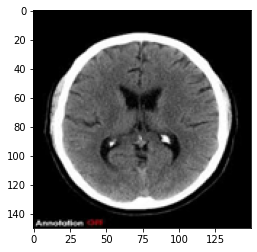

In [14]:
plt.imshow(dataset[0])

Membuat beberapa citra hasil augmentasi dari citra sebelumnya dan disimpan di direktori yang telah dibuat sebelumnya

In [15]:
i = 0
for j in datagen.flow(x, batch_size = 32,
                      save_to_dir = "/content/augmented_result", 
                      save_prefix = "aug_rslt", 
                      save_format="png"):
  i += 1
  if (i>30):
    break

menampilkan beberapa citra hasil augmentasi

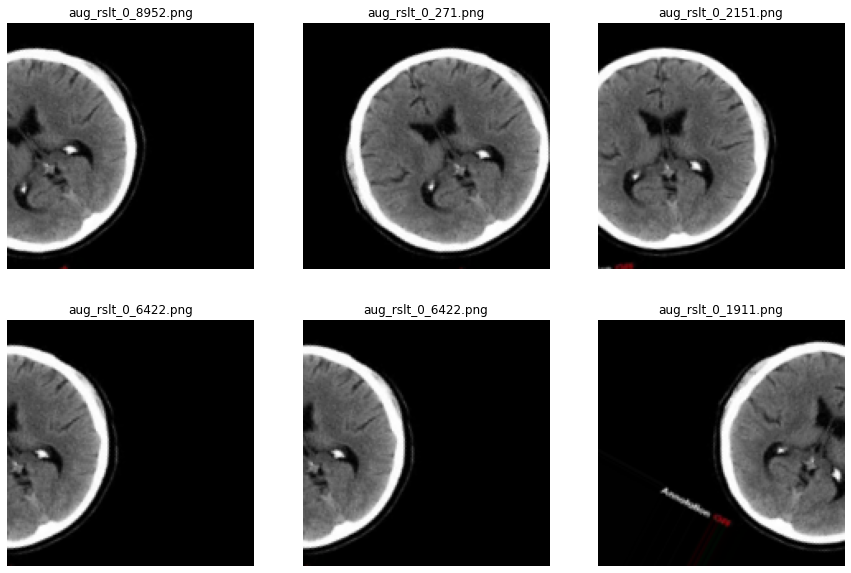

In [16]:
path = "/content/augmented_result/"
file_names = os.listdir(path)

_, axes_list = plt.subplots(2, 3, figsize=(5*3, 5*2))

for axes in axes_list:
  for ax in axes:
    ax.axis("off")
    img = np.random.choice(file_names)
    ax.imshow(np.array(io.imread(f"{path}{img}")))
    ax.set_title(img)


## DENOISING

Menghilangkan noise dari citra dengan menggunakan Kernel gaussian 

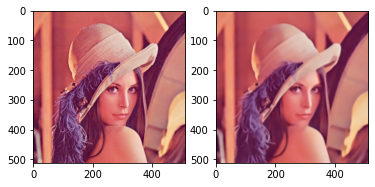

In [17]:
image1 = cv.GaussianBlur(image_rgb, (7,7), 0)
rgb_dst = cv.fastNlMeansDenoisingColored(image1, None, 10, 10, 7, 15)

plt.subplot(121), plt.imshow(image_rgb)
plt.subplot(122), plt.imshow(rgb_dst)

plt.show()